### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fonctions_tp1_approximation import *
from utils_tp1_approximation import * 

from mpl_toolkits.mplot3d import Axes3D

In [3]:
## Nombre de temps à évaluer pour construire les courbes approximantes
nb_echantillon = 50
## Temps d'avaluation asscoié à chaque échantillon
list_t = echantillonnage(nb_ech = nb_echantillon)

## Polynômes de Bernstein

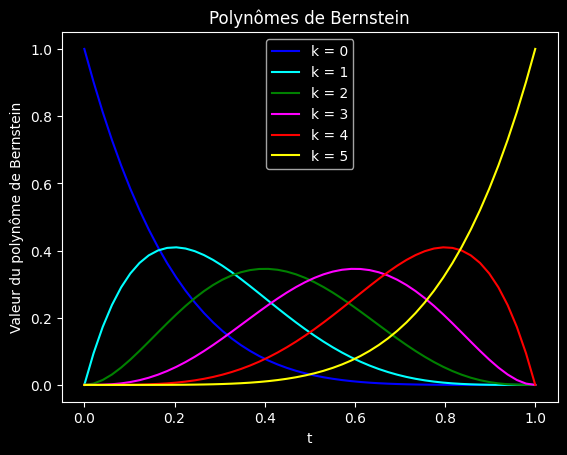

In [4]:
degre_max = 5

# Base des polynomes de Bernstein
base = build_polys_bernstein(degre_max, list_t)

## Affichage
for i in range(len(base)):
    courbe_i = base[i]
    plt.plot(courbe_i[:,0], courbe_i[:,1], color=liste_couleurs[i % len(liste_couleurs)], label=f'k = {i}')

plt.legend()
plt.xlabel('t')
plt.ylabel('Valeur du polynôme de Bernstein')
plt.title('Polynômes de Bernstein')
plt.show()

## DeCasteljau Evaluation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


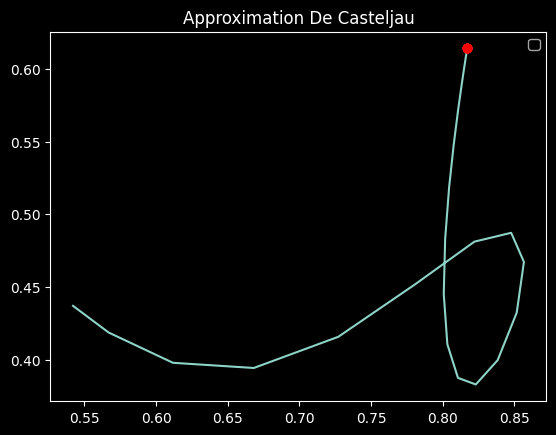

In [5]:
## Points de contrôle initiaux 
nb_pts_controle = 6
X_pts_controles,Y_pts_controles = generate_points(nb_pts_controle)

liste_points = []
for tt in list_t:
    # Approximation des abscisses
    x = DeCasteljau(X_pts_controles, tt)
    # Approximation des ordonnées
    y = DeCasteljau(Y_pts_controles, tt)
    liste_points.append([x,y])

points = np.array(liste_points)
plt.plot(points[:,0], points[:,1])
plt.plot(X_pts_controles, Y_pts_controles, color='red', marker='o', linestyle='--', linewidth=0.5)  
plt.scatter(X_pts_controles, Y_pts_controles)
plt.legend()
plt.title('Approximation De Casteljau')
plt.show()

## DeCasteljau Subdivision
Une étape de subdivision : {Pi} --> {Qj} et {Rk}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


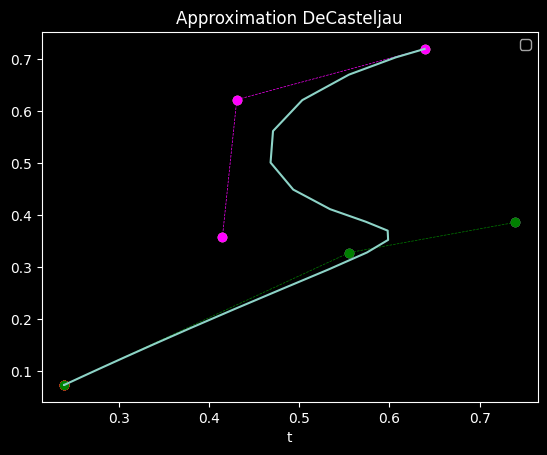

In [6]:
## Points  de contrôle initiaux 
nb_pts_controle = 5
X_pts_controles,Y_pts_controles = generate_points(nb_pts_controle)

## Subdivision
QX, QY, RX, RY = subdivision(X_pts_controles, Y_pts_controles)
points = np.array(liste_points)

## Courbe 
liste_points = []
for tt in list_t:
    x = DeCasteljau(X_pts_controles, tt); 
    y = DeCasteljau(Y_pts_controles, tt)
    liste_points.append([x,y])
points_sub = np.array(liste_points)

## Points de controle initiaux
plt.plot(X_pts_controles, Y_pts_controles, color='red', marker='o', linestyle='--', linewidth=0.5) 
plt.scatter(X_pts_controles, Y_pts_controles)
## Points de controle de gauche sur [0,1/2]
plt.plot(QX, QY, color='magenta', marker='o', linestyle='--', linewidth=0.5) 
plt.scatter(QX, QY)
## Points de controle de droite sur [1/2,1]
plt.plot(RX, RY, color='green', marker='o', linestyle='--', linewidth=0.5) 
plt.scatter(RX, RY)
## Courbes 
plt.plot(points_sub[:,0], points_sub[:,1])
plt.legend()
plt.xlabel('t')
plt.title('Approximation DeCasteljau')
plt.show()


Appel récursif pour réaliser n subdivision

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


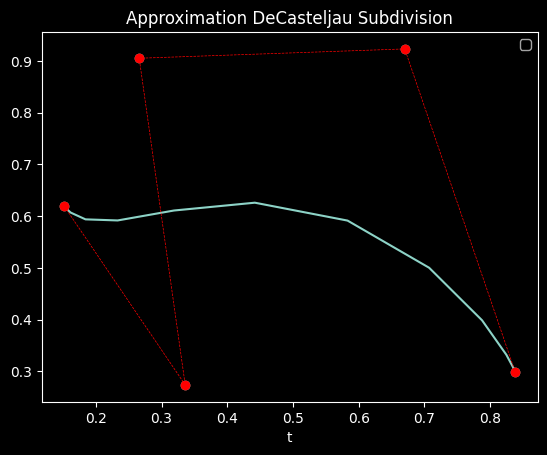

In [7]:
## Points  de contrôle initiaux 
nb_pts_controle = 5
X_pts_controles,Y_pts_controles = generate_points(nb_pts_controle)
nb_subdivision = 10


(X_subdivision, Ysubdivision) = DeCasteljauSub(X_pts_controles, Y_pts_controles, nb_subdivision)
arr_points = np.zeros((len(X_subdivision),2))

for i in range(len(X_subdivision)):
    arr_points[i,:] = [X_subdivision[i], Ysubdivision[i]]

plt.plot(arr_points[:,0], arr_points[:,1])
plt.plot(X_pts_controles, Y_pts_controles, color='red', marker='o', linestyle='--', linewidth=0.5) 
plt.scatter(X_pts_controles, Y_pts_controles)
plt.legend()
plt.xlabel('t')
plt.title('Approximation DeCasteljau Subdivision')
plt.show()


## Surface de Bezier en produit tensoriel

(50, 50, 3)


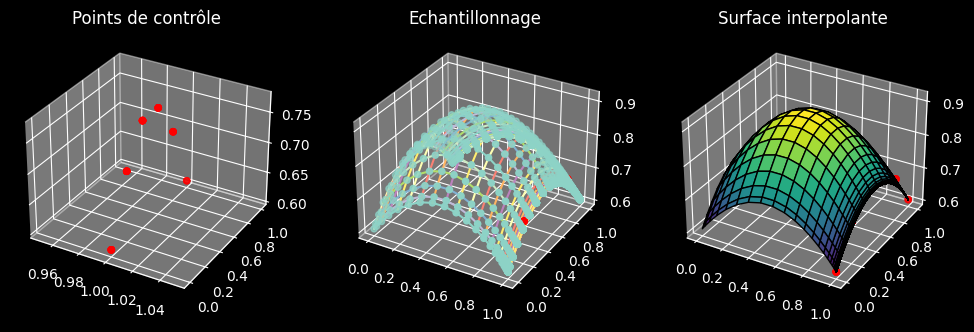

In [8]:
# Générer une grille de points de contrôle régulière
nb_point_grille = 6
X, Y = np.meshgrid(np.linspace(0, 1, nb_point_grille), np.linspace(0, 1, nb_point_grille))
Z = np.exp(-((X-0.5)**2  + (Y-0.5)**2))


# Paramétrisation 
nb_echantillon_surface = 10
cc = echantillonnage(nb_ech = nb_echantillon)

# Interpoler la surface
approx_surface = approximation_surface(X, Y, Z, list_t, nb_point_grille)

print(approx_surface.shape)
# Visualisation
show_surface(X, Y, Z, approx_surface)